## Time-series analysis of treatment and control zones along Senegal river

Try and organise this methodically, first start with some global stats and then get into more time-series oriented analysis

In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_theme()

---

Medians and averages at different intervals

In [10]:
# Read the data
tzo = pd.read_pickle('treatment_zone_observed.pkl') #treatment zone observed - tzo
czo = pd.read_pickle('control_zone_observed.pkl') #control zone observed - czo

# Get Dataframe info
tzo.info()
czo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 379 entries, 93 to 837
Columns: 179 entries, id to geometry
dtypes: float64(178), geometry(1)
memory usage: 533.0 KB
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 430 entries, 15 to 814
Columns: 179 entries, id to geometry
dtypes: float64(178), geometry(1)
memory usage: 604.7 KB


In [67]:
tzo_timeseries = tzo.iloc[:, 4:-1].T
czo_timeseries = czo.iloc[:, 4:-1].T

In [68]:
tzo_timeseries.index = [datetime.strptime(x, '%Y_%m_%d') for x in tzo_timeseries.index]
czo_timeseries.index = [datetime.strptime(x, '%Y_%m_%d') for x in czo_timeseries.index]

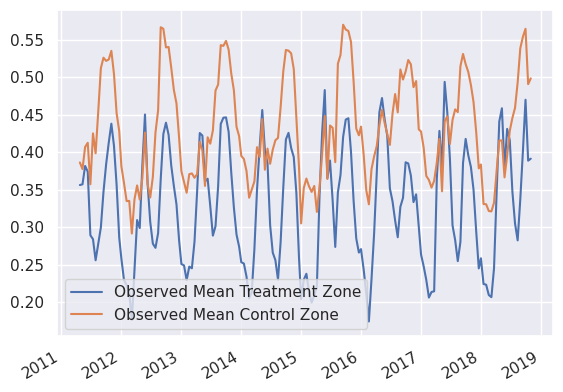

In [83]:
plt.close()
tzo_timeseries.T.describe().loc['mean'].plot(label='Observed Mean Treatment Zone')
czo_timeseries.T.describe().loc['mean'].plot(label='Observed Mean Control Zone')
plt.legend()
plt.show()

So there appears to be an area around Lac du Guiers that has a very high NDVI. This is what is offsetting the plot above.

However, the treatment areas do look like they are double-cropping. So perhaps a better value to examine is the total NDVI, integral or sum.

...

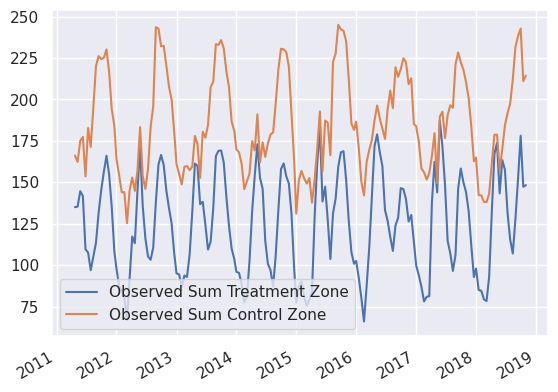

In [94]:
plt.close()
tzo_timeseries.T.sum().plot(label='Observed Sum Treatment Zone')
czo_timeseries.T.sum().plot(label='Observed Sum Control Zone')
plt.legend()
plt.show()

In [95]:
tzo

,id,lon,lat,cluster,2011_04_23,2011_05_09,2011_05_25,2011_06_10,2011_06_26,2011_07_12,...,2018_06_26,2018_07_12,2018_07_28,2018_08_13,2018_08_29,2018_09_14,2018_09_30,2018_10_16,2018_11_01,geometry
93,232883.0,-16.132514,16.530208,56.0,0.2326,0.2246,0.2294,0.2413,0.2346,0.2167,...,0.4815,0.4175,0.2773,0.2329,0.2258,0.2940,0.3203,0.3860,0.3621,POINT (-16.13251 16.53021)
97,238931.0,-15.936680,16.526042,76.0,0.3822,0.3937,0.3558,0.4358,0.3162,0.3738,...,0.4205,0.2720,0.2860,0.2748,0.4225,0.5615,0.5674,0.6042,0.6853,POINT (-15.93668 16.52604)
109,250734.0,-16.155430,16.517708,12.0,0.2708,0.2603,0.2609,0.2737,0.2113,0.1398,...,0.2727,0.2865,0.3086,0.2144,0.3629,0.5603,0.6432,0.5389,0.5284,POINT (-16.15543 16.51771)
113,253709.0,-16.159597,16.515625,80.0,0.2883,0.2520,0.2796,0.2746,0.2361,0.1976,...,0.2518,0.2322,0.2570,0.0575,0.1641,0.6121,0.7041,0.5820,0.5967,POINT (-16.15960 16.51563)
116,256693.0,-16.145014,16.513542,86.0,0.2676,0.3116,0.3873,0.4230,0.2469,0.2228,...,0.2832,0.2809,0.2557,0.2649,0.2632,0.3635,0.5146,0.4297,0.4297,POINT (-16.14501 16.51354)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,849199.0,-15.972097,16.098958,76.0,0.2423,0.2361,0.2395,0.2378,0.2381,0.3712,...,0.2656,0.2048,0.3384,0.3277,0.4221,0.4229,0.4238,0.3711,0.3010,POINT (-15.97210 16.09896)
823,855165.0,-15.947097,16.094792,76.0,0.2882,0.3116,0.2863,0.3026,0.2461,0.4328,...,0.2564,0.2945,0.3326,0.3558,0.3791,0.4025,0.3416,0.3466,0.3542,POINT (-15.94710 16.09479)
824,861112.0,-15.961680,16.090625,76.0,0.2570,0.2471,0.2527,0.2520,0.2662,0.3585,...,0.2949,0.3277,0.3607,0.3614,0.4263,0.4617,0.4971,0.3334,0.2681,POINT (-15.96168 16.09063)
826,864085.0,-15.970014,16.088542,76.0,0.3565,0.2728,0.3046,0.2956,0.2341,0.3889,...,0.2780,0.3125,0.3470,0.3987,0.4506,0.4529,0.4554,0.3413,0.3290,POINT (-15.97001 16.08854)
